## Steps: 

1. Split the dataset into training (80%) and testing (20%) sets. 
2. Train the following models: 
    - Logistic Regression 
    - Decision Tree 
    - Random Forest 
    - Support Vector Machine (SVM) 
3. Evaluate models using: 
    - Accuracy, Precision, Recall, F1-score 
    - ROC Curve & AUC Score 

In [1]:
# Load the data
import pandas as pd

# df = pd.read_csv('../data/selected_features_heart_disease.csv')
df = pd.read_csv('../data/processed_heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,1,0.750380,-0.276443,1,2,0.017494,0,1.068965,3,-0.721976,2,0
1,1.378929,1,4,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,2,1.411625,3,1
2,-1.941680,1,3,-0.095506,0.051047,0,0,1.633010,0,2.099753,3,-0.721976,1,0
3,-1.498933,0,2,-0.095506,-0.835103,0,2,0.978071,0,0.295874,1,-0.721976,1,0
4,0.161372,1,2,-0.659431,-0.218651,0,0,1.240047,0,-0.219520,1,-0.721976,1,0


## 1. Split the dataset into training (80%) and testing (20%) sets. 

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208, 13), (53, 13), (208,), (53,))

## 2. Train the models

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


## 3. Evaluate the models

<Figure size 1500x1200 with 0 Axes>

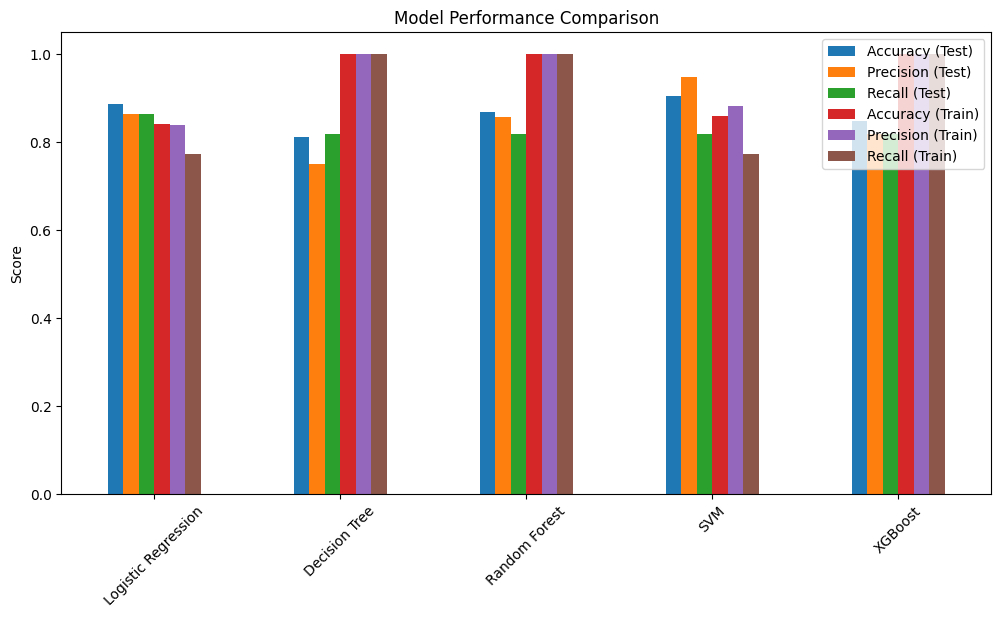

In [5]:
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, confusion_matrix)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb
}

results = {}

for name, model in models.items():
    # Testing metrics
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    # Training metrics
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train)

    results[name] = {
        'Accuracy (Test)': acc,
        'Precision (Test)': prec,
        'Recall (Test)': rec,
        'Accuracy (Train)': acc_train,
        'Precision (Train)': prec_train,
        'Recall (Train)': rec_train,
    }

# Plot results
plt.figure(figsize=(15, 12))
results_df = pd.DataFrame(results).T
results_df = results_df[['Accuracy (Test)', 'Precision (Test)', 'Recall (Test)',
                         'Accuracy (Train)', 'Precision (Train)', 'Recall (Train)']]
ax = results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()